<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
data = files.upload()

Saving rock_density_xray.csv to rock_density_xray.csv


In [ ]:
df = pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [ ]:
df.columns = ['Signal', 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

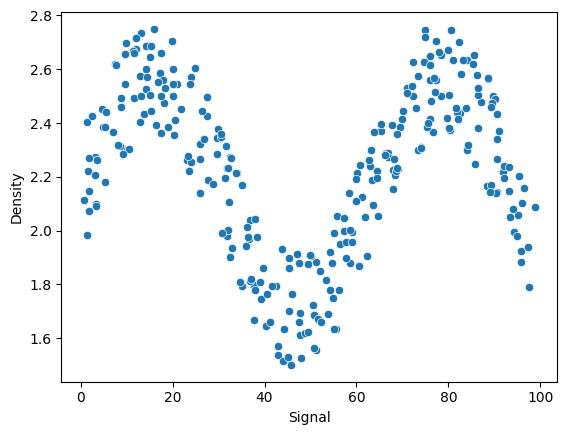

In [ ]:
sns.scatterplot(data=df, x='Signal', y='Density')

In [ ]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_pred = lr_model.predict(X_test)

In [ ]:
lr_pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_test, lr_pred)

0.211198973318633

In [ ]:
np.sqrt(mean_squared_error(y_test, lr_pred))

0.2570051996584629

In [ ]:
signal_range = np.arange(0, 100)
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

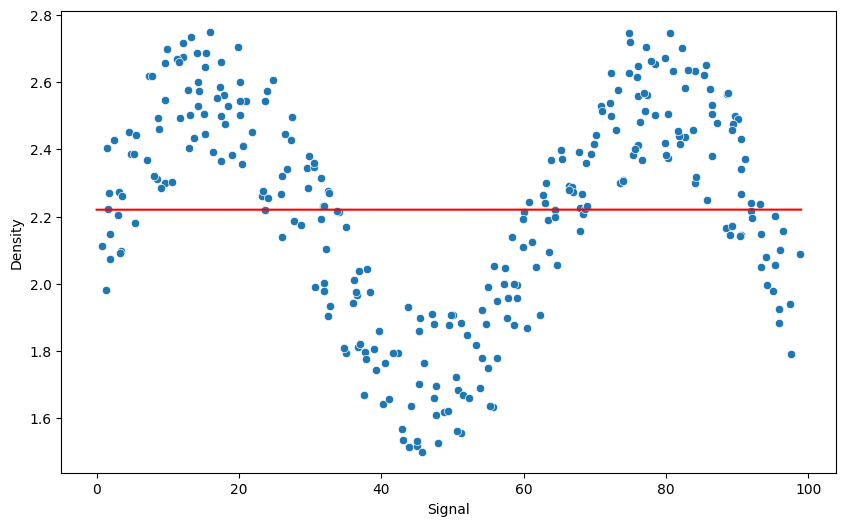

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Signal', y='Density')

plt.plot(signal_range, signal_preds, color='red')

Polynomial Model

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test):

  # Fit model training
  model.fit(X_train, y_train)

  # Get Metrics
  pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, pred)
  rmse = np.sqrt(mean_squared_error(y_test, pred))
  print(f'MAE: {mae}')
  print(f'RMSE: {rmse}')

  # Plot results model signal range
  signal_range = np.arange(0, 100)
  output = model.predict(signal_range.reshape(-1, 1))

  plt.figure(figsize=(10, 6))
  sns.scatterplot(data=df, x='Signal', y='Density')

  plt.plot(signal_range, output, color='red')

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.11969122389483997
RMSE: 0.13807449061369673


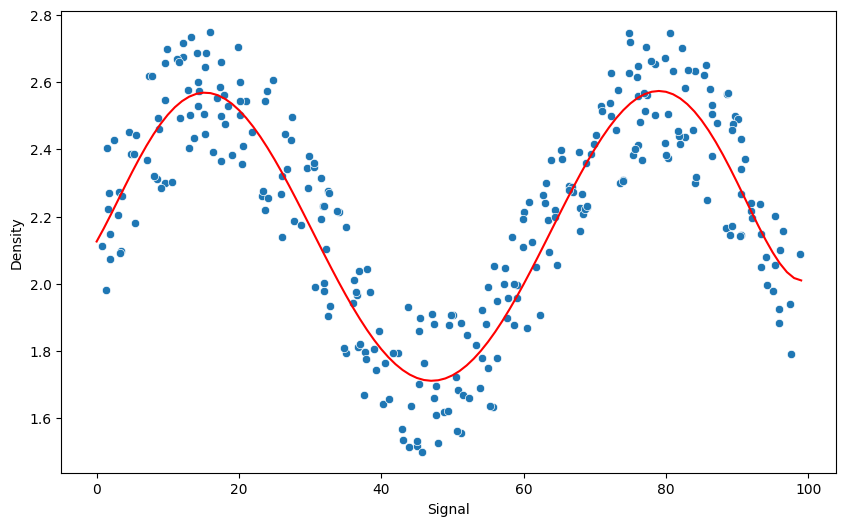

In [ ]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.11675547318512912
RMSE: 0.13411326765251463


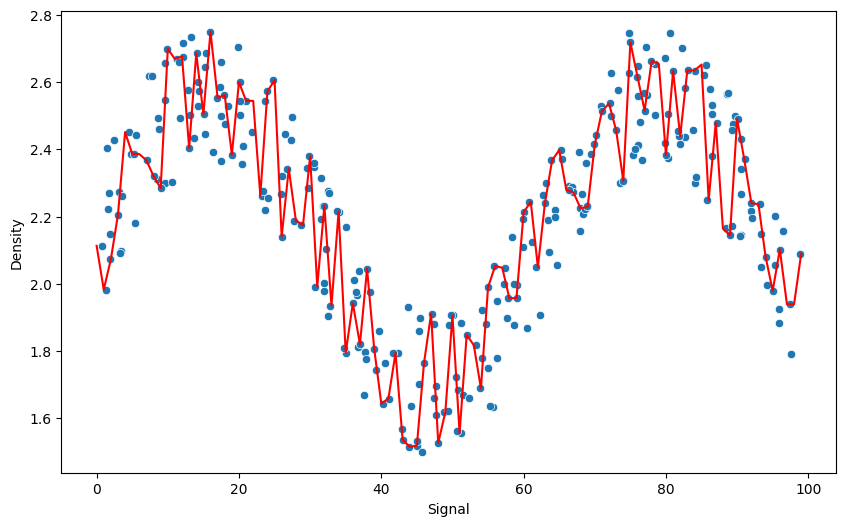

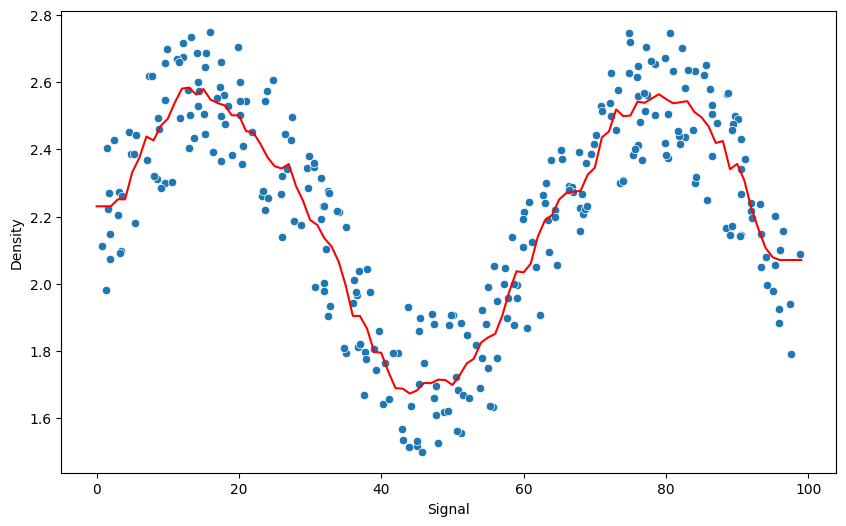

In [ ]:
k_values = [1, 13]

for k in k_values:
  model = KNeighborsRegressor(n_neighbors=k)
  run_model(model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


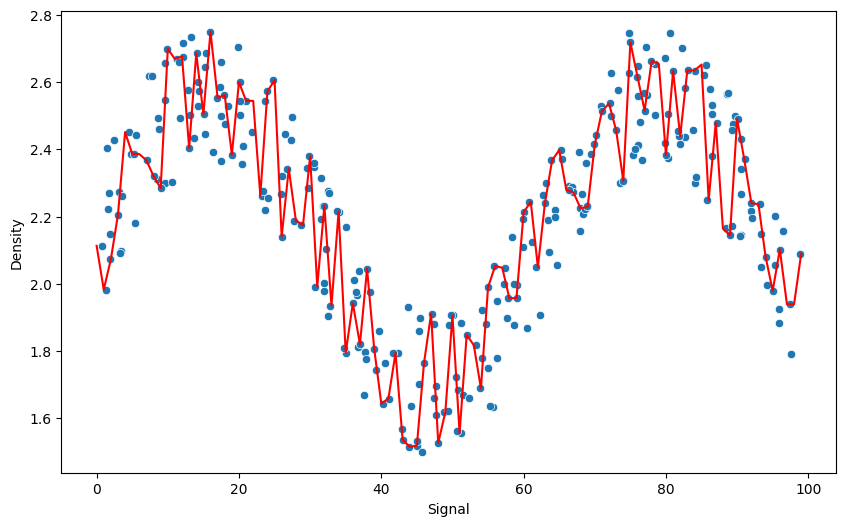

In [ ]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

MAE: 0.10854210121349125
RMSE: 0.12646999302047557


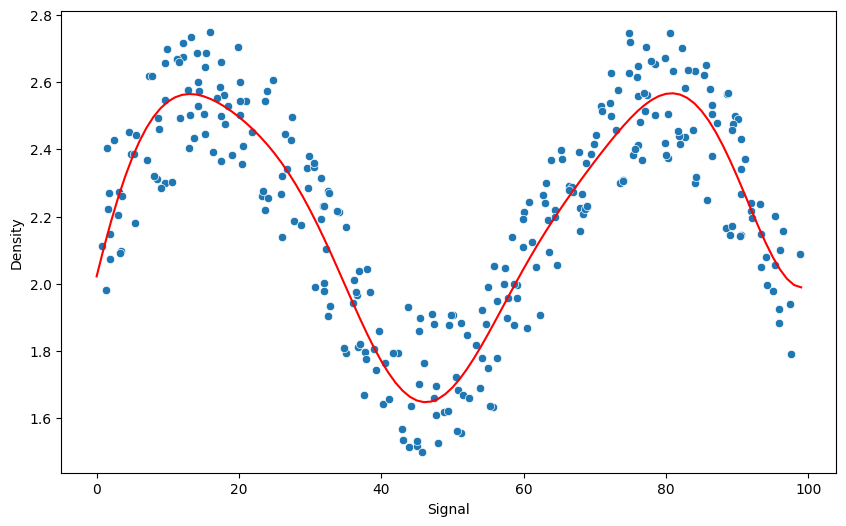

In [ ]:
svr = SVR()

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
                    'gamma': ['scale', 'auto']}

grid = GridSearchCV(svr, param_grid)
run_model(grid, X_train, y_train, X_test, y_test)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

MAE: 0.11855298116898336
RMSE: 0.14516532270795326


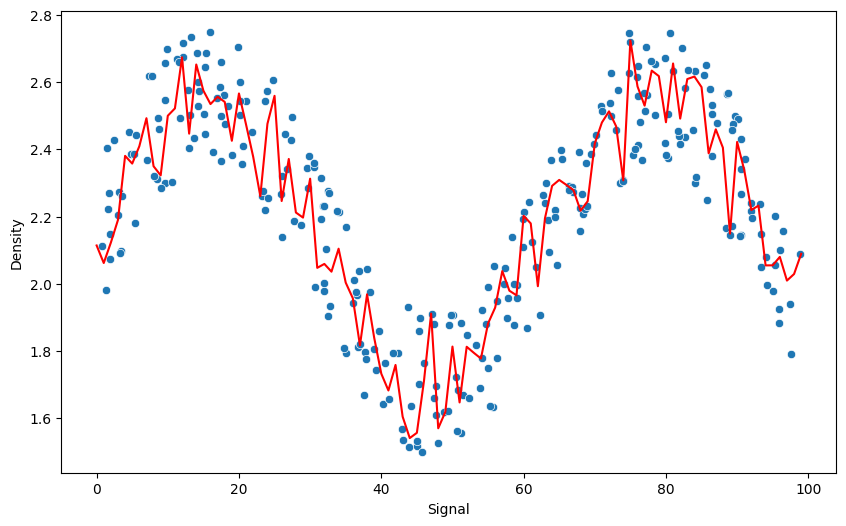

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

run_model(rfr, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


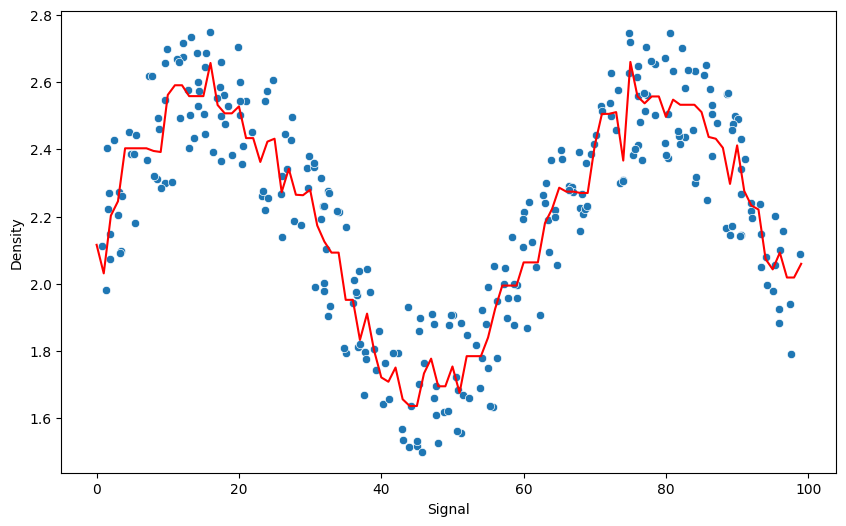

In [ ]:
model = GradientBoostingRegressor()

run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.12181728323557021
RMSE: 0.1399053558044617


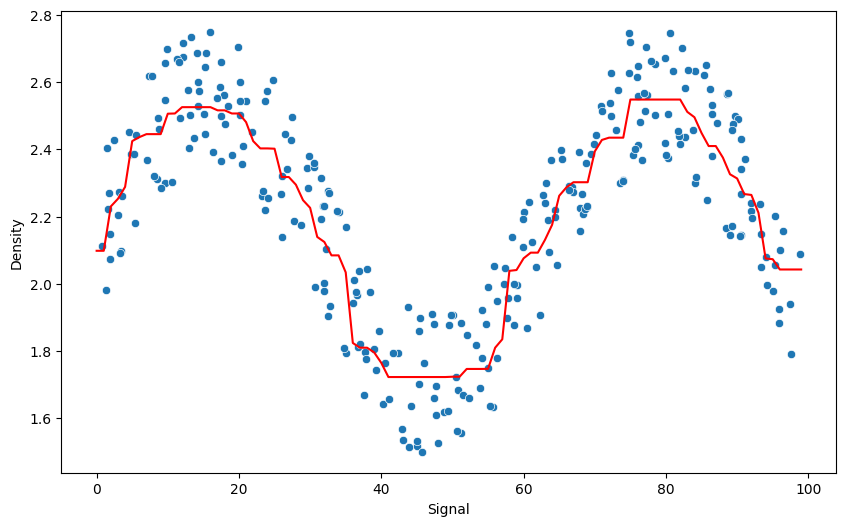

In [ ]:
model = AdaBoostRegressor()

run_model(model, X_train, y_train, X_test, y_test)